# Optimizing Portfolios


## Python optimizers

Optimizers is one of the most important library of a Machine Learning (ML) framowork. Most of ML models are 
formuled as an optimization problems, i.e. minimizing a given cost function. Historically, __Gradient Descent__ was one 
of the first optmization methods used for accomplishing such task. 

__Gradient Descent__ is based on the observation that if a 
multivariate function $f()$ is defined and differentiable in a neighborhood of a given point $a$ then for $\alpha$ small 
enough  

$$f(a) \geq f \big( a-\alpha \bigtriangledown f(a) \big)$$

and if $$f(a) = f\big( a-\alpha \bigtriangledown f(a) \big)$$ if and only if $\alpha=0$ then $a$ is a __local minimum__. Also, 
__if $f()$ is a convex function__ then $a$ is also a __global minimum__. 

One of the main problems with __Gradient Descent__ is that it needs for each iteration you to provide $\alpha$ also 
known as __learning rate__. If $\alpha$ is too small you are going to converge too slowly. On the other hand, if $\alpha$
is too large you might diverge from the local optimum. 

There are more sophisticated algorithms than Gradient Descent that are able to select the best learning 
rate automatically and, hence, for which you only need to provide 
* $f()$, i.e. the cost-function  
* $\bigtriangledown f()$, i.e. the gradient 

The most popular of these algorithms are 
* [Conjugate Gradient](https://en.wikipedia.org/wiki/Conjugate_gradient_method)
* [BFGS](https://en.wikipedia.org/wiki/Broyden%E2%80%93Fletcher%E2%80%93Goldfarb%E2%80%93Shanno_algorithm)
* [L-BFGS](https://en.wikipedia.org/wiki/Limited-memory_BFGS)

Python offers the package [scipy.optimize](http://docs.scipy.org/doc/scipy/reference/optimize.html) 
where to minimize a function the following methods are available:
* minimize(method=’Nelder-Mead’), usually applied to nonlinear optimization problems 
for which derivatives may not be known 
* minimize(method=’Powell’), usually applied to functions that need not be differentiable, 
and no derivatives are taken
* minimize(method=’CG’), a.k.a. _Conjugate Gradient_ (see above)
* minimize(method=’BFGS’), see above 
* minimize(method=’Newton-CG’), variant of Conjugate Gradient
* minimize(method=’L-BFGS-B’), see above L-BFGS
* minimize(method=’TNC’)
* minimize(method=’COBYLA’), i.e. _Constrained optimization by linear approximation_  is 
a numerical optimization method for constrained problems where the derivative of the 
objective function is not known, invented by Michael J. D. Powell.
* minimize(method=’SLSQP’), i.e. _Sequential quadratic programming_ is an 
iterative method for nonlinear optimization.
* minimize(method=’dogleg’)
* minimize(method=’trust-ncg’)

Let's see these algorithms in action.  

### Parabola


In [294]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as spo 


def parab(X):
    ## X = 2 is the min
    Y = (X - 2)**2 + 1.5 
    return Y

initial_guess = 3
opt_methods_no_Jacobian = ['Nelder-Mead','Powell','CG','BFGS','L-BFGS-B','TNC','COBYLA','SLSQP']
mins = [spo.minimize(parab,initial_guess,method=om,) for om in opt_methods_no_Jacobian]

min_df = pd.DataFrame({'Method' : opt_methods_no_Jacobian,
 'min' : [m.x for m in mins]
  }).set_index('Method')
min_df

,min
Method,
Nelder-Mead,[2.00002441406]
Powell,1.9999999999683606
CG,[1.99]
BFGS,[1.99999999056]
L-BFGS-B,[2.0]
TNC,[2.00000000168]
COBYLA,2.0001
SLSQP,[2.0]


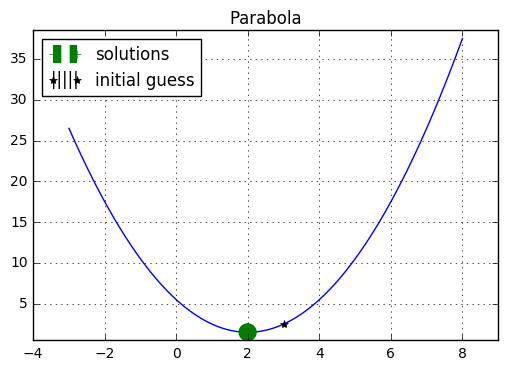

In [295]:
def plot_mins(f,min_df,xmin=-5,xmax=5,ticks=1000,title='',xguess=3,legend_pos='upper left'):
    x = np.linspace(xmin, xmax, ticks)
    y = f(x)
    
    plt.plot(x, y ,color='b')
    
    plt.plot(min_df, f(min_df),'g',linewidth=13,marker="+",label='solutions')
    
    plt.plot(xguess, f(xguess),'black',linewidth=13,marker="*",label='initial guess')
    
    plt.axis([xmin-1, xmax+1, y.min()-1, y.max()+1])
    
    plt.title(title)
    
    plt.grid(True)
    plt.legend(loc=legend_pos)
    
    plt.show()
    
    
plot_mins(f=parab,min_df=min_df,xmin=-3,xmax=8,title='Parabola')

### Non-Convex example

In [296]:
def non_convex_1(X):
    if type(X) is float:
        if X <=0 or X >=4:
            return 5.5
        else: 
            return (X - 2)**2 + 1.5 
    else:
        Y = (X - 2)**2 + 1.5 
        Y[np.logical_or(X <= 0 , X >=4)] = 5.5
        return Y

initial_guess = 4.5
mins = [spo.minimize(non_convex_1,initial_guess,method=om,) for om in opt_methods_no_Jacobian]

min_df = pd.DataFrame({'Method' : opt_methods_no_Jacobian,
 'min' : [m.x for m in mins]
  }).set_index('Method')
min_df

,min
Method,
Nelder-Mead,[4.5]
Powell,7.087928961545842
CG,[4.5]
BFGS,[4.5]
L-BFGS-B,[4.5]
TNC,[4.5]
COBYLA,4.5
SLSQP,[4.5]


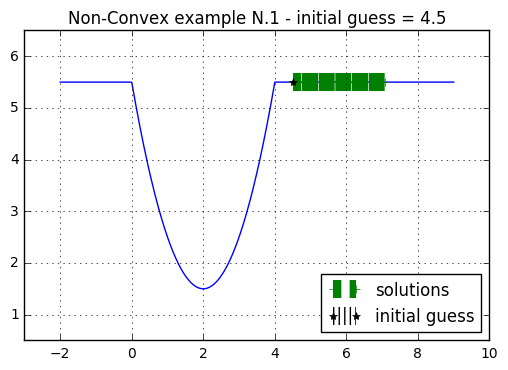

In [297]:
plot_mins(f=non_convex_1,min_df=min_df,xmin=-2,xmax=9,title='Non-Convex example N.1 - initial guess = 4.5',
          xguess=4.5,legend_pos='lower right')

In [298]:
initial_guess = 3.9
mins = [spo.minimize(non_convex_1,initial_guess,method=om,) for om in opt_methods_no_Jacobian]

min_df = pd.DataFrame({'Method' : opt_methods_no_Jacobian,
 'min' : [m.x for m in mins]
  }).set_index('Method')
min_df

,min
Method,
Nelder-Mead,[1.99998779297]
Powell,1.9999999999683606
CG,[1.99999984958]
BFGS,[2.00000003039]
L-BFGS-B,[1.99999996669]
TNC,[1.99999999867]
COBYLA,1.99989765625
SLSQP,[2.0]


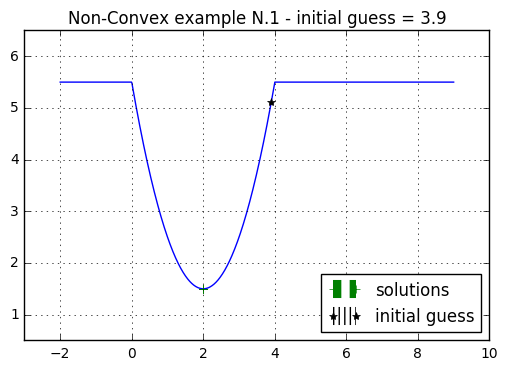

In [299]:
plot_mins(f=non_convex_1,min_df=min_df,xmin=-2,xmax=9,title='Non-Convex example N.1 - initial guess = 3.9',
          xguess=3.9,legend_pos='lower right')

The problem with such __function__ is the fact it is __not convex__. Hence, starting from initial guess 
x = 3.9 the above optimizers are able to find the global minimum. On the contrary, starting from initial guess x = 4.5 
no optmizer is able to find the global minimum. 

### Basin Hopping and Simulated Annealing
For solving this optimization problem we need something more than the above optmiziation methods. 
For instance, __simulated annealing__ is one of the most widely used algorithms for finding the global minimum 
of a multivariable function for different complex systems. In __scipy.optimize__ __simulated annealing__ has been 
replaced by __Basin Hopping__ that is a global optimization framework  
particularly suited for multivariable multimodal optimization problems 

In [300]:
from scipy.optimize import basinhopping
res = basinhopping(non_convex_1, 4.5, minimizer_kwargs={"method": "BFGS"},niter=200)

In [301]:
res.x

array([ 2.00000001])

We can see that Basin Hopping is able to find the global minimum instead of previous methods. 

### More dimensions, contraints and bounds  

Let us consider the problem of minimizing the Rosenbrock function. 
This function (and its respective derivatives) is implemented in rosen

In [302]:
from scipy.optimize import minimize, rosen, rosen_der

In [307]:
mins = [spo.minimize(rosen,[1.3, 0.7, 0.8, 1.9, 1.2],method=om,) for om in opt_methods_no_Jacobian]

min_df = pd.DataFrame({'Method' : opt_methods_no_Jacobian,
 'min' : [m.x for m in mins], 
  'min_value': [rosen(m.x) for m in mins]
  }).set_index('Method')
min_df.sort_values(by = 'min_value' , inplace=True)
min_df

,min,min_value
Method,,
Powell,"[1.0, 1.0, 1.0, 1.0, 1.0]",1.696763e-22
L-BFGS-B,"[0.999999569191, 0.999999146161, 0.99999833610...",1.504062e-11
BFGS,"[0.999999245546, 0.999998516729, 0.99999706458...",4.582239e-11
CG,"[0.999998258204, 0.99999652201, 0.99999303492,...",2.587047e-10
SLSQP,"[0.999996799614, 0.999995480491, 0.99999335775...",2.434160e-09
TNC,"[0.999971153807, 0.999943162109, 0.9998872987,...",6.736061e-08
Nelder-Mead,"[0.999101151259, 0.998209232287, 0.99646345959...",6.617482e-05
COBYLA,"[1.03328356885, 1.06781943615, 1.14060138059, ...",1.166637e-01


We can see that all optimizers provide close minima although __Powell__ makes a better job this time. 
Let's test __Basin Hopping__

In [311]:
res = basinhopping(rosen, [1.3, 0.7, 0.8, 1.9, 1.2], minimizer_kwargs={"method": "BFGS"},niter=200)
print(">>> basinhopping min: "+str(res.x)+" - min_value:"+str(rosen(res.x)))

>>> basinhopping min: [ 0.99999973  0.99999939  0.99999878  0.99999759  0.99999519] - min_value:8.36187470659e-12


Pretty close the other ones. 
Let's concatenate results. 

In [312]:
min_df = pd.DataFrame({'Method' : opt_methods_no_Jacobian+['Basin Hopping'],
 'min' : [m.x for m in mins]+[res.x], 
  'min_value': [rosen(m.x) for m in mins]+[rosen(res.x)]
  }).set_index('Method')
min_df.sort_values(by = 'min_value' , inplace=True)
min_df

,min,min_value
Method,,
Powell,"[1.0, 1.0, 1.0, 1.0, 1.0]",1.696763e-22
Basin Hopping,"[0.999999730064, 0.999999391769, 0.99999877674...",8.361875e-12
L-BFGS-B,"[0.999999569191, 0.999999146161, 0.99999833610...",1.504062e-11
BFGS,"[0.999999245546, 0.999998516729, 0.99999706458...",4.582239e-11
CG,"[0.999998258204, 0.99999652201, 0.99999303492,...",2.587047e-10
SLSQP,"[0.999996799614, 0.999995480491, 0.99999335775...",2.434160e-09
TNC,"[0.999971153807, 0.999943162109, 0.9998872987,...",6.736061e-08
Nelder-Mead,"[0.999101151259, 0.998209232287, 0.99646345959...",6.617482e-05
COBYLA,"[1.03328356885, 1.06781943615, 1.14060138059, ...",1.166637e-01


### Bounds

Let's say variables must be not negative. 
As there are methods (e.g. Nelder-Mead) that cannot handle constraints nor bounds we use a different approach. 
We modify the cost function so that if constraints or bounds don't hold a very large value is returned. 

In [326]:
def my_rosen(x,out_value=10e10):
    
    ## no negative values 
    if np.any(x<0.0):
        return out_value
    
    return rosen(x)

In [330]:
mins = [spo.minimize(my_rosen,[1.3, 0.7, 0.8, 1.9, 1.2],method=om,) for om in opt_methods_no_Jacobian]

min_df = pd.DataFrame({'Method' : opt_methods_no_Jacobian,
 'min' : [m.x for m in mins], 
  'min_value': [rosen(m.x) for m in mins]
  }).set_index('Method')
min_df.sort_values(by = 'min_value' , inplace=True)
res = basinhopping(my_rosen, [1.3, 0.7, 0.8, 1.9, 1.2], minimizer_kwargs={"method": "BFGS"},niter=200)
min_df = pd.DataFrame({'Method' : opt_methods_no_Jacobian+['Basin Hopping'],
 'min' : [m.x for m in mins]+[res.x], 
  'min_value': [rosen(m.x) for m in mins]+[rosen(res.x)]
  }).set_index('Method')
min_df.sort_values(by = 'min_value' , inplace=True)
min_df

,min,min_value
Method,,
Powell,"[1.0, 1.0, 1.0, 1.0, 1.0]",3.319898e-22
CG,"[1.00000000075, 1.00000001398, 1.00000003705, ...",1.111023e-13
Basin Hopping,"[0.999999740044, 0.999999617752, 0.99999920757...",1.167208e-11
L-BFGS-B,"[0.999999569191, 0.999999146161, 0.99999833610...",1.504062e-11
BFGS,"[0.999999305001, 0.999998588025, 0.99999718981...",4.205330e-11
TNC,"[0.999971153807, 0.999943162109, 0.9998872987,...",6.736061e-08
SLSQP,"[0.999981003037, 1.00000561327, 1.00001633397,...",2.008566e-07
Nelder-Mead,"[0.999101151259, 0.998209232287, 0.99646345959...",6.617482e-05
COBYLA,"[1.03328356885, 1.06781943615, 1.14060138059, ...",1.166637e-01


We know that the global minima is (1,1,1,1) so we should not have sub-optimal solution requiring the constraints that 
the points must lie on the hyperplane identified by all vector components with same value, i.e. $x_1=x_2=x_3=x_4$ 

In [382]:
def my_rosen(x,out_value=10e10,approx = 0.1):
    
    ## no negative values 
    if np.any(x<0.0):
        return out_value
    
    ## x1 = x2 = x3 = x4 
    if type(x) is list:
        x = np.array(x)
    if  np.absolute(x[0] - x[1])<approx and np.absolute(x[0] - x[2])<approx and np.absolute(x[0] - x[3])<approx and np.absolute(x[1] - x[2])<approx and np.absolute(x[1] - x[3])<approx and np.absolute(x[2] - x[3])<approx:
        rosen(x)
    else:
        return out_value

In [383]:
mins = [spo.minimize(my_rosen,[1.3, 0.7, 0.8, 1.9, 1.2],method=om,) for om in opt_methods_no_Jacobian]

min_df = pd.DataFrame({'Method' : opt_methods_no_Jacobian,
 'min' : [m.x for m in mins], 
  'min_value': [rosen(m.x) for m in mins]
  }).set_index('Method')
min_df.sort_values(by = 'min_value' , inplace=True)
res = basinhopping(my_rosen, [1.3, 0.7, 0.8, 1.9, 1.2], minimizer_kwargs={"method": "BFGS"},niter=200)
min_df = pd.DataFrame({'Method' : opt_methods_no_Jacobian+['Basin Hopping'],
 'min' : [m.x for m in mins]+[res.x], 
  'min_value': [rosen(m.x) for m in mins]+[rosen(res.x)]
  }).set_index('Method')
min_df.sort_values(by = 'min_value' , inplace=True)
min_df

,min,min_value
Method,,
Nelder-Mead,"[1.3, 0.7, 0.8, 1.9, 1.2]",848.220000
CG,"[1.3, 0.7, 0.8, 1.9, 1.2]",848.220000
BFGS,"[1.3, 0.7, 0.8, 1.9, 1.2]",848.220000
L-BFGS-B,"[1.3, 0.7, 0.8, 1.9, 1.2]",848.220000
TNC,"[1.3, 0.7, 0.8, 1.9, 1.2]",848.220000
COBYLA,"[1.3, 0.7, 0.8, 1.9, 1.2]",848.220000
SLSQP,"[1.3, 0.7, 0.8, 1.9, 1.2]",848.220000
Basin Hopping,"[1.3, 0.7, 0.8, 1.9, 1.2]",848.220000
Powell,"[3.88792896155, 3.28792896155, 3.38792896155, ...",51161.317214


__We can see that no one handled this constraint properly__.

We need to change approach restricting the list of methods to the ones able to handle constraints and bounds.